In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib notebook

csvpath = "Resources\CensusData.csv"

sales_df = pd.DataFrame(pd.read_csv(csvpath))
sales_df.head()

,Year,United States,South,West
0,1963,560,199,141
1,1964,565,200,129
2,1965,575,210,129
3,1966,461,166,99
4,1967,487,179,119


In [8]:
csvpath2= "Resources\FedData.csv"
rate_df = pd.DataFrame(pd.read_csv(csvpath2))
rate_df
inflation_rate= rate_df.groupby(["Year"]).mean()['Inflation Rate']
inflation_rate_df = pd.DataFrame(inflation_rate)
inflation_rate_df.head()

,Inflation Rate
Year,
1954,NaN
1955,NaN
1956,NaN
1957,NaN
1958,2.283333


In [15]:
sales_inflation_df = pd.merge(sales_df,inflation_rate_df, on="Year", how="inner")
#sales_inflation_df=sales_inflation_df.rename(index=str, columns={'United States': 'National Home Sales',
#                                                               'South':'South Home Sales', 
#                                                              'West': 'West Home Sales'})
sales_inflation_df

,Year,United States,South,West,Inflation Rate
0,1963,560,199,141,1.275000
1,1964,565,200,129,1.500000
2,1965,575,210,129,1.441667
3,1966,461,166,99,2.416667
4,1967,487,179,119,3.475000
5,1968,490,177,121,4.633333
6,1969,448,175,114,5.808333
7,1970,485,203,121,6.241667
8,1971,656,270,176,4.708333
9,1972,718,305,187,3.066667


In [16]:
sales_inflation_df.corr()

,Year,United States,South,West,Inflation Rate
Year,1.000000,0.157559,0.420334,0.143382,-0.481938
United States,0.157559,1.000000,0.941071,0.977481,-0.174560
South,0.420334,0.941071,1.000000,0.893617,-0.245270
West,0.143382,0.977481,0.893617,1.000000,-0.079457
Inflation Rate,-0.481938,-0.174560,-0.245270,-0.079457,1.000000


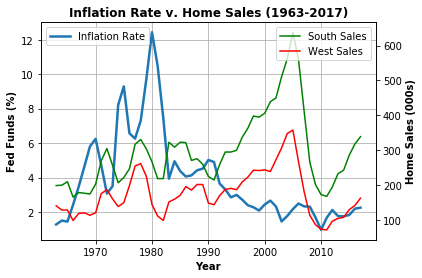

In [20]:
home_sales=[]
south_sales =[]
west_sales = []
for sale in sales_inflation_df["United States"]:
    int_sale=int(sale)
    home_sales.append(int_sale)
for sale in sales_inflation_df["South"]:
    int_south_sale=int(sale)
    south_sales.append(int_south_sale)
for sale in sales_inflation_df["West"]:
    int_west_sale=int(sale)
    west_sales.append(int_west_sale)
fig, ax1=plt.subplots()
x=np.arange(1963,2018)
n=sales_inflation_df['Inflation Rate']
ax1.plot(x,n,linewidth=2.5)
ax2=ax1.twinx()
#ax2.plot(x,home_sales,color="r", label="National Sales")
ax2.plot(x,south_sales,color="g", label="South Sales")
ax2.plot(x,west_sales,color="r", label="West Sales")
ax1.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
ax1.set_title('Inflation Rate v. Home Sales (1963-2017)',fontweight="bold")
ax1.set_xlabel('Year', fontweight="bold")
ax1.set_ylabel('Fed Funds (%)',fontweight="bold")
ax2.set_ylabel('Home Sales (000s)',fontweight="bold")
plt.savefig('Graph Images/Inflation_Home_Sales.png')

In [21]:
sales_pre_TwoK = sales_inflation_df[0:42]
sales_pre_TwoK.corr()


,Year,United States,South,West,Inflation Rate
Year,1.000000,0.703568,0.796824,0.705846,-0.276404
United States,0.703568,1.000000,0.963253,0.970803,-0.438146
South,0.796824,0.963253,1.000000,0.918262,-0.357860
West,0.705846,0.970803,0.918262,1.000000,-0.306431
Inflation Rate,-0.276404,-0.438146,-0.357860,-0.306431,1.000000


In [22]:
sales_post_TwoK= sales_inflation_df[42:55]
sales_post_TwoK.corr()

,Year,United States,South,West,Inflation Rate
Year,1.000000,-0.548929,-0.508981,-0.506648,-0.177043
United States,-0.548929,1.000000,0.996800,0.993964,0.601613
South,-0.508981,0.996800,1.000000,0.987521,0.632573
West,-0.506648,0.993964,0.987521,1.000000,0.577063
Inflation Rate,-0.177043,0.601613,0.632573,0.577063,1.000000
